<a href="https://colab.research.google.com/github/vgnesh/StockPredictor/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/Stock Prediction"

HEROMOTOCO_NS.csv  StockPrediction.ipynb


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Stock Prediction/HEROMOTOCO_NS.csv")
df.isnull().any()
df = df.fillna(method='ffill')
rows = df.values.tolist()

In [0]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

dataset = new_data.values

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [0]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]))

In [0]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

# Support Vector Machine with a Radial Basis Function as kernel 
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf_svr.fit(x_train,y_train)
closing_price_svr = clf_svr.predict(X_test)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(x_train,y_train)
closing_price_rf = clf_rf.predict(X_test)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(n_estimators=200)
clf_gb.fit(x_train,y_train)
closing_price_gb = clf_gb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

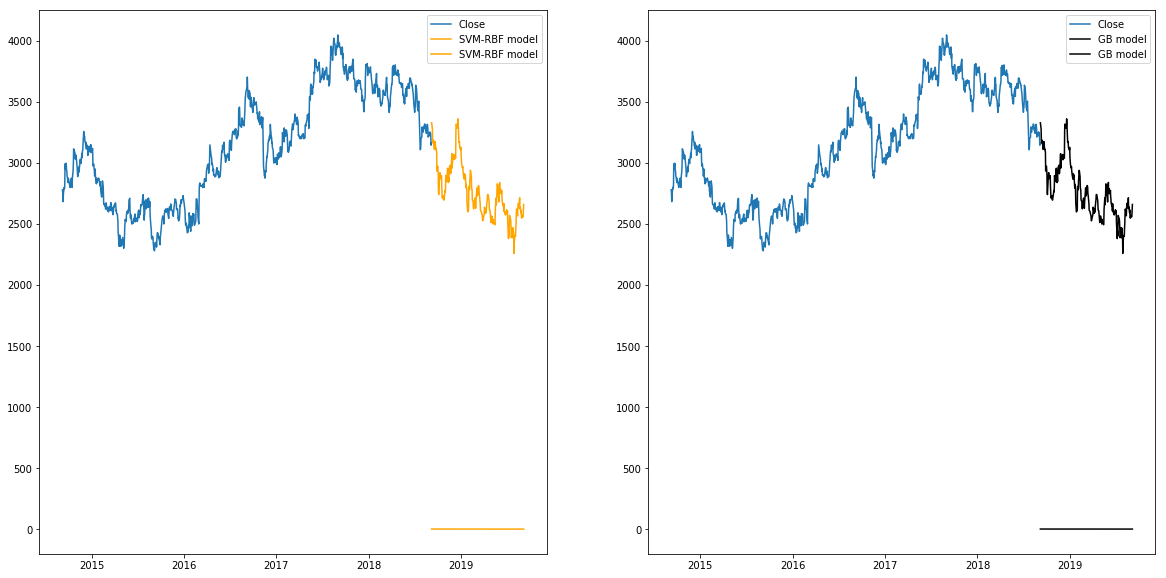

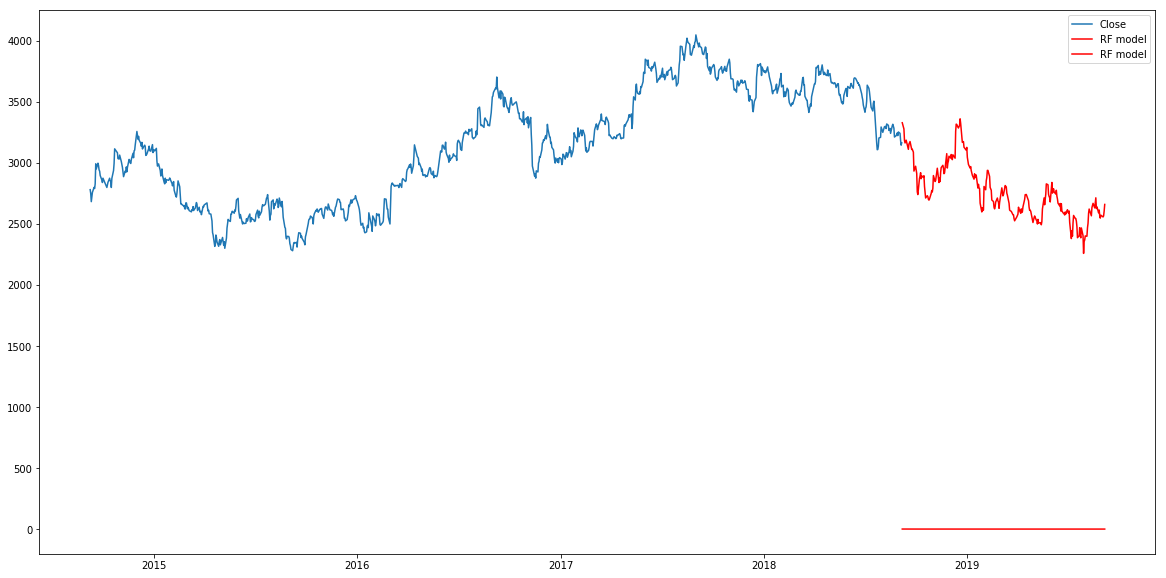

In [43]:
import matplotlib.pyplot as plt 
train = new_data[:987]
valid = new_data[987:]
f,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

# Support Vector Machine
ax1.plot(train['Close'])
valid['PredictionsSVR'] = closing_price_svr
ax1.plot(valid[['Close','PredictionsSVR']],color='orange',label='SVM-RBF model')
ax1.legend()

# Gradient Boosting Regressor
ax2.plot(train['Close'])
valid['PredictionsGB'] = closing_price_gb
ax2.plot(valid[['Close','PredictionsGB']],color='black',label='GB model')
ax2.legend()

f1,ax3 = plt.subplots(1,1,figsize=(20,10))

# Random Forest Regressor
ax3.plot(train['Close'])
valid['PredictionsRF'] = closing_price_rf
ax3.plot(valid[['Close','PredictionsRF']],color='red',label='RF model')
ax3.legend()

